In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dc.csv')
df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [ ]:
df = df.rename(columns = {'Unnamed: 0' : 'Time'})
df['Time'] = pd.to_datetime(df['Time'])
df = df.iloc[::-1].set_index('Time')

df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


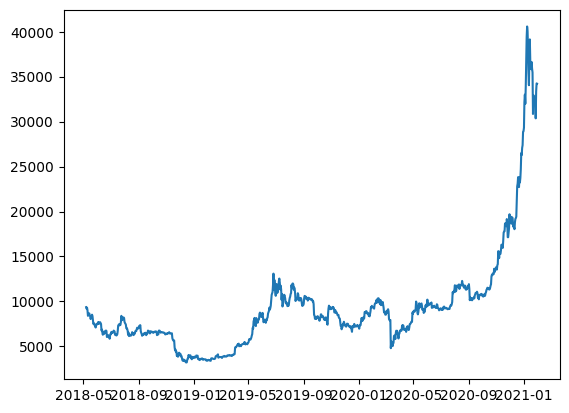

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['close_USD'])
plt.show()

In [ ]:
train = df.iloc[:-200]
test = df.iloc[-200:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


#sample parameters
model = ARIMA(train.close_USD, order=(2, 1, 0))
results = model.fit()

# Make predictions for the test set
forecast = results.forecast(steps=200)
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,predicted_mean
2020-07-15,9252.006931
2020-07-16,9252.942627
2020-07-17,9252.688291
2020-07-18,9252.752780
2020-07-19,9252.735700
...,...
2021-01-26,9252.739185
2021-01-27,9252.739185
2021-01-28,9252.739185
2021-01-29,9252.739185


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#mean absolute error
mae = mean_absolute_error(test.close_USD, forecast)

#root mean square error
mse = mean_squared_error(test.close_USD, forecast)
rmse = np.sqrt(mse)

#mean absolute percentage error
mape = (forecast - test.close_USD).abs().div(test.close_USD).mean()

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 7956.23
RMSE: 11705.11
MAPE: 0.35%


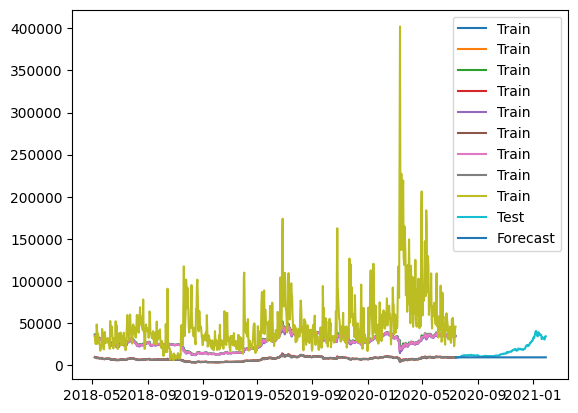

In [ ]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test.close_USD, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
df_p = df.reset_index()[["Time", "close_USD"]].rename(
    columns={"Time": "ds", "close_USD": "y"}
)

In [ ]:
import pandas as pd
from prophet import Prophet

model = Prophet()

# Fit the model
model.fit(df_p)

# create date to predict
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

predictions.head()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprwlgrqmm/32ozxvl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprwlgrqmm/6x4flsw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18329', 'data', 'file=/tmp/tmprwlgrqmm/32ozxvl5.json', 'init=/tmp/tmprwlgrqmm/6x4flsw8.json', 'output', 'file=/tmp/tmprwlgrqmm/prophet_modelkqkcpii6/prophet_model-20240907235213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:52:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:52:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,2919.153990,5798.969303,8514.679926,2919.153990,2919.153990,4270.014799,4270.014799,4270.014799,9.556417,9.556417,9.556417,4260.458382,4260.458382,4260.458382,0.0,0.0,0.0,7189.168789
1,2018-05-08,2936.842326,5917.464163,8656.746811,2936.842326,2936.842326,4323.932682,4323.932682,4323.932682,-18.061121,-18.061121,-18.061121,4341.993803,4341.993803,4341.993803,0.0,0.0,0.0,7260.775008
2,2018-05-09,2954.530663,6074.607005,8624.301229,2954.530663,2954.530663,4441.999239,4441.999239,4441.999239,24.504559,24.504559,24.504559,4417.494680,4417.494680,4417.494680,0.0,0.0,0.0,7396.529902
3,2018-05-10,2972.218999,6101.617004,8758.069405,2972.218999,2972.218999,4474.835612,4474.835612,4474.835612,-11.128537,-11.128537,-11.128537,4485.964149,4485.964149,4485.964149,0.0,0.0,0.0,7447.054611
4,2018-05-11,2989.907336,6192.141120,8853.429434,2989.907336,2989.907336,4551.854837,4551.854837,4551.854837,5.332431,5.332431,5.332431,4546.522406,4546.522406,4546.522406,0.0,0.0,0.0,7541.762173


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


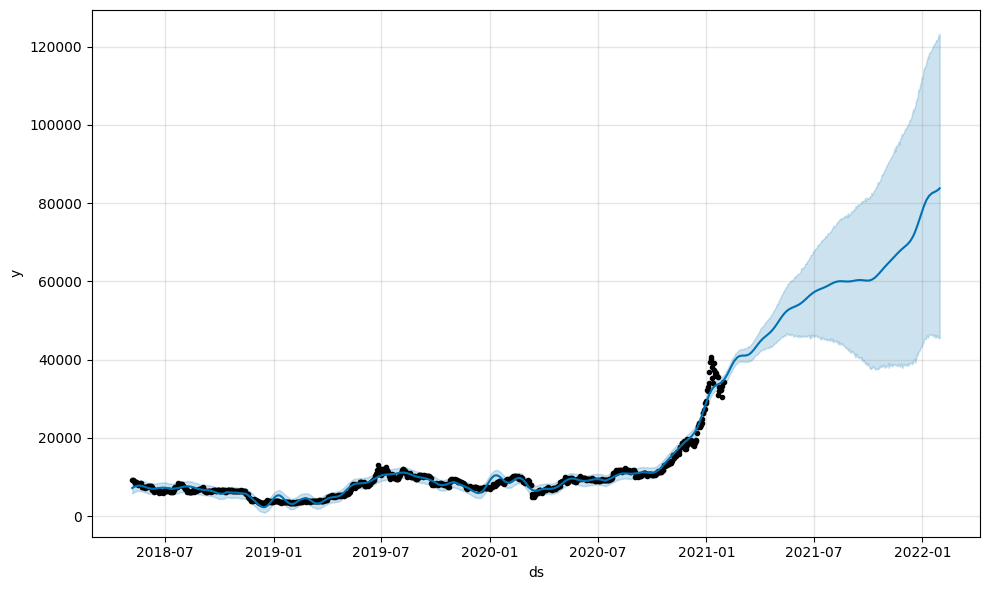

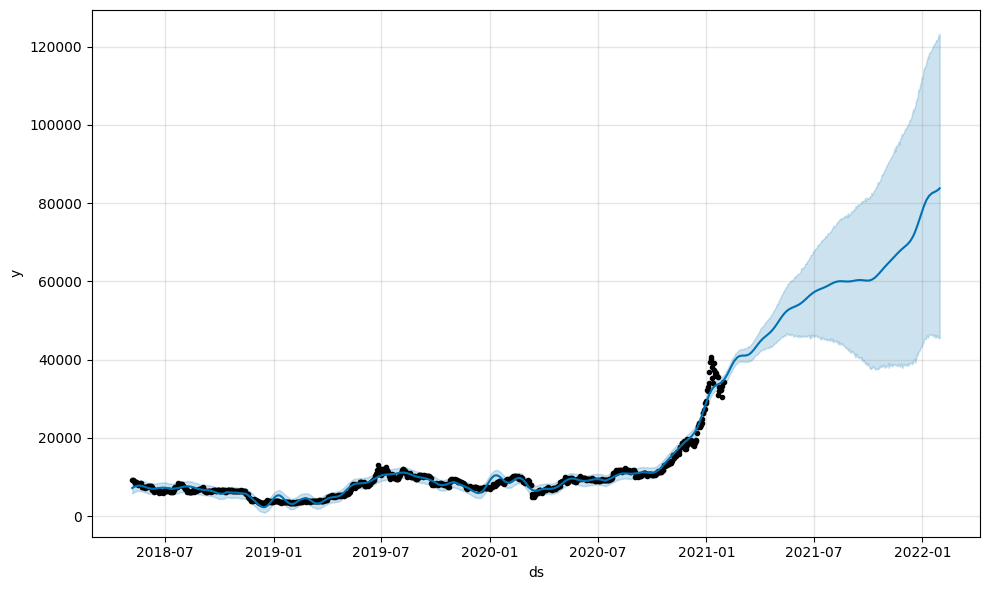

In [ ]:
model.plot(predictions)

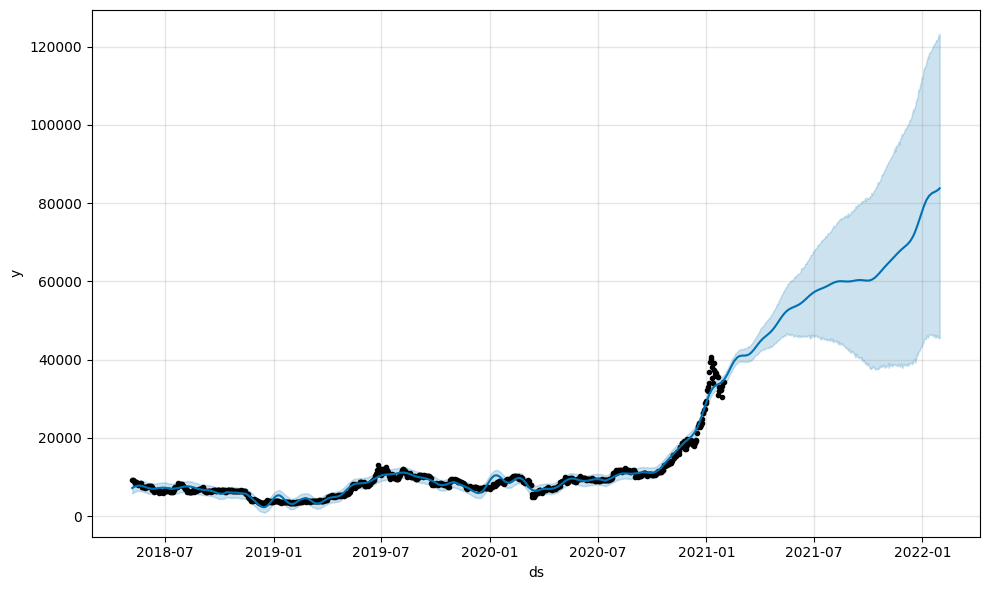

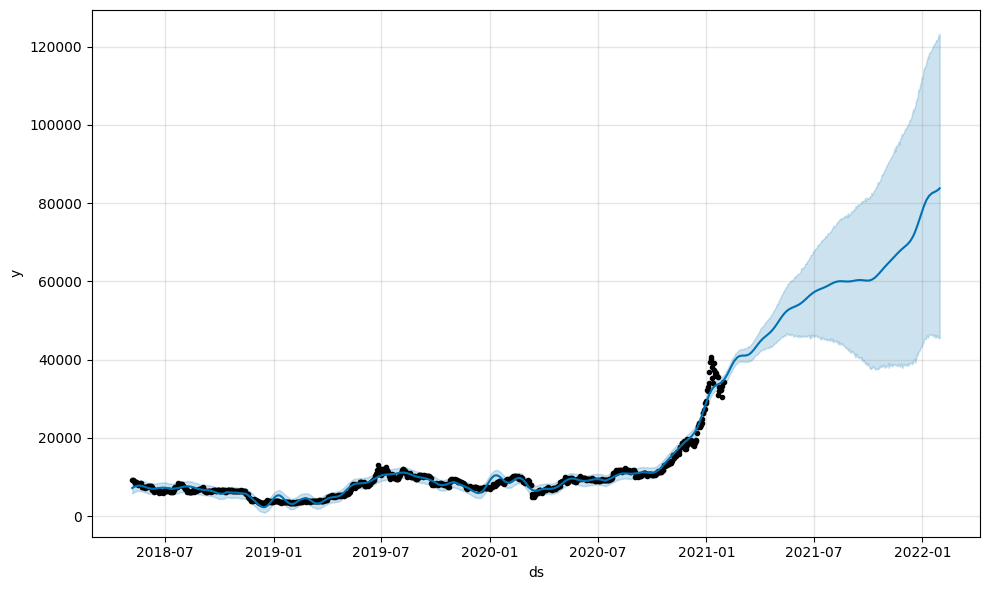

In [ ]:
model.plot(predictions)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

INFO:prophet:Making 2 forecasts with cutoffs between 2019-08-04 00:00:00 and 2020-01-31 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprwlgrqmm/t0hum7rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprwlgrqmm/2b6ptlbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48028', 'data', 'file=/tmp/tmprwlgrqmm/t0hum7rq.json', 'init=/tmp/tmprwlgrqmm/2b6ptlbz.json', 'output', 'file=/tmp/tmprwlgrqmm/prophet_modelb57yuod8/prophet_model-20240907235354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:53:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprwlgrqmm/y89ifufk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprwlgrqmm/l2_r9cgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,7.925838e+05,890.271744,730.114945,0.073326,0.075506,0.075800,0.493151
1,38 days,7.998562e+05,894.346811,729.473486,0.073914,0.072847,0.076027,0.506849
2,39 days,8.036711e+05,896.477036,723.759547,0.074045,0.072132,0.075798,0.520548
3,40 days,7.974396e+05,892.994722,715.292257,0.073962,0.070827,0.075341,0.534247
4,41 days,1.040421e+06,1020.010266,746.409722,0.084070,0.066528,0.081086,0.547945
...,...,...,...,...,...,...,...,...
324,361 days,1.302981e+08,11414.819187,9831.440601,0.490650,0.516569,0.495832,0.547945
325,362 days,1.315811e+08,11470.882396,9891.013641,0.489259,0.506374,0.496241,0.534247
326,363 days,1.339003e+08,11571.528475,9980.795732,0.487567,0.506374,0.497038,0.520548
327,364 days,1.366156e+08,11688.268795,10089.318517,0.486711,0.500150,0.498728,0.506849


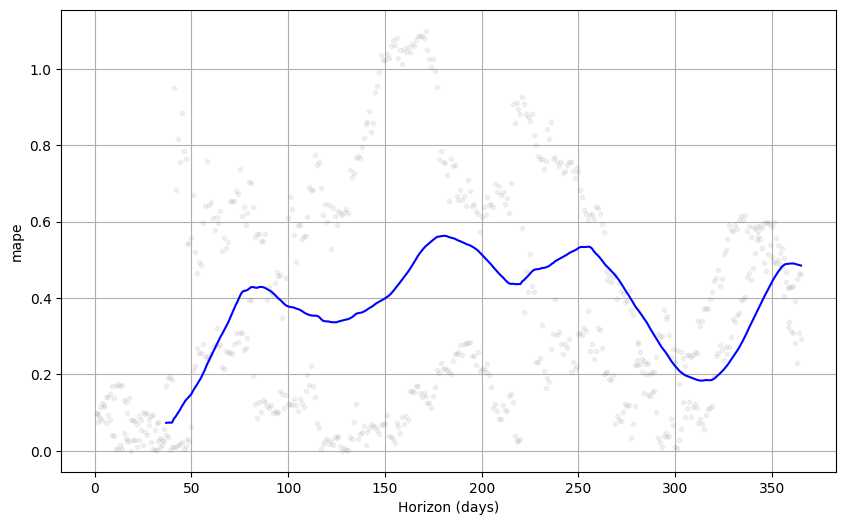

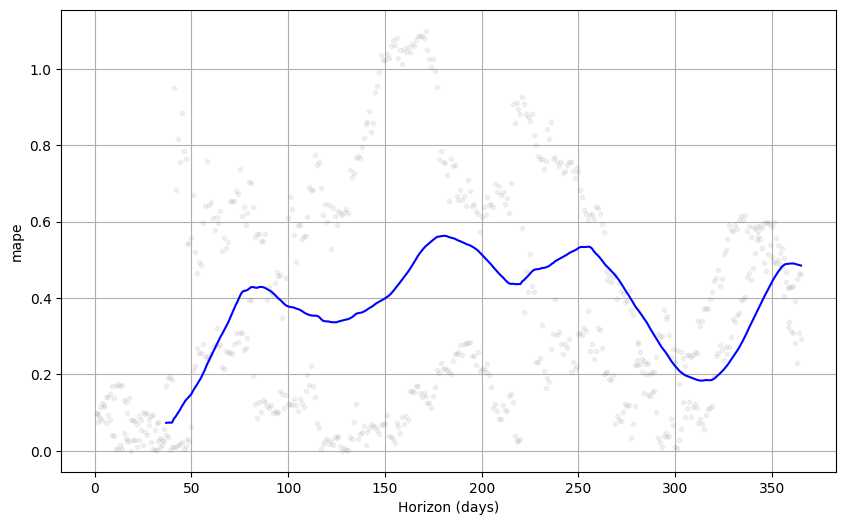

In [ ]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mape')